# seaborn

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
%matplotlib inline
%config lnlineBackend.figure_format = 'retina'

In [3]:
# seaborn basic

In [34]:
x = np.linspace(0, 14, 100) #np.linspace는 시작값과 종료값 사이에서 지정된 개수만큼 균등간격으로 선형적으로 분포하는 값 생성 np.arange는 얼마나 많은 변수를 사용하는지 알려준다.
len(x)

100

In [35]:
# x = np.arange(0, 14, 100) #np.linspace는 시작값과 종료값 사이에서 지정된 개수만큼 균등간격으로 선형적으로 분포하는 값 생성 np.arange는 얼마나 많은 변수를 사용하는지 알려준다.
# len(x) 답은 1 나오게된다.

In [36]:
y1 = np.sin(x)
y2 = 2 + np.sin(x*0.5)
y3 = 3 + np.sin(x*1.2)
y4 = 4 + np.sin(x*1.5)

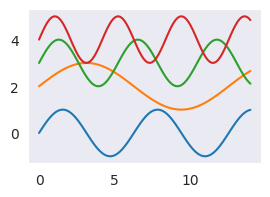

In [38]:
plt.figure(figsize=(3,2))
plt.plot(x, y1,x,y2,x,y3,x,y4) # 한칸에 다 쓸수 있음
# plt.plot(x, y2)
plt.show();

# plt.figure(figsize=(3, 2))
# plt.plot(x, y1)
# plt.plot(x, y2)
# plt.plot(x, y3)
# plt.plot(x, y4)
# plt.show()

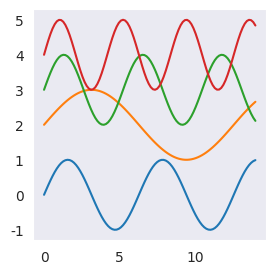

In [7]:

# import seaborn as sns
#white, whitegridm dark, darkgrid



sns.set_style('dark')
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(x,y1,x,y2,x,y3,x,y4)
plt.show();

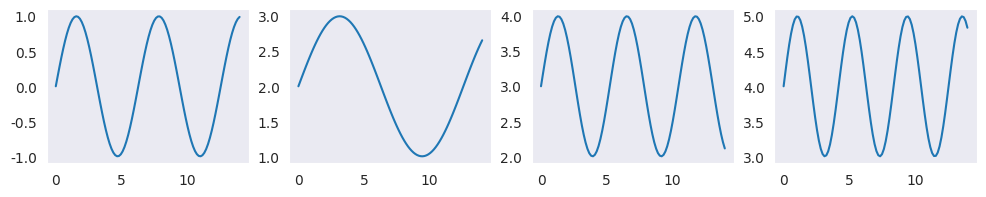

In [39]:
# 그래프 여러개

fig, ax = plt.subplots(nrows =1, ncols= 4,figsize =(12,2)) #열 1개 행 4개
ax[0].plot(x,y1)
ax[1].plot(x,y2)    # rows = 행, ncols= 열
ax[2].plot(x,y3)   # 가로이므로 좌표가 아닌 순서대로 x는 동일하다
ax[3].plot(x,y4)

plt.show();

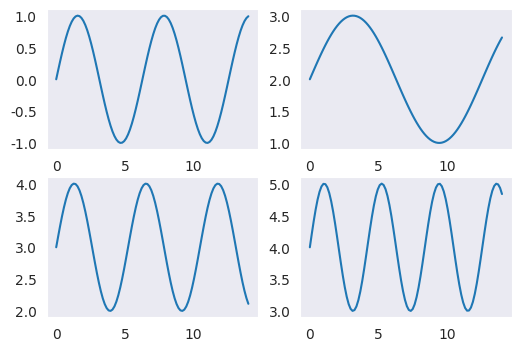

In [41]:
fig, ax = plt.subplots(nrows =2, ncols= 2,figsize=(6,4)) #열 2개 행 2개
ax[0,0].plot(x,y1)
ax[0,1].plot(x,y2)
ax[1,0].plot(x,y3)
ax[1,1].plot(x,y4)

plt.show();

### seaborn heatamp

In [10]:
flights = sns.load_dataset('flights')

In [42]:
type(flights) #데이터 타입을 확인해 보며 어떠한 데이터인지 유추가능하다.

pandas.core.frame.DataFrame

In [11]:
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [12]:
flights.info() # 컬럼 3개 데이터 144로 들어가 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [13]:
# 인덱스로 month
# 컬럼은 년도가 되었으면 좋겠어요
# 그리고 그 안에 들어가는 데이터 값은 승객 수였으면 좋겠습니다.

In [14]:
pd.pivot(data = flights, index='month',columns='year', values='passengers')
# 참고: 특정 연산 없이 데이터의 구조만을 바꿀 때 np.pivot() 사용 가능
# pd.pivot(data=flights, index='month', columns='year')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [43]:
flights_pivot = pd.pivot_table(data = flights, index = 'month', columns = 'year', values = 'passengers')

In [50]:
pd.pivot(data = flights, index='year',columns='month',values = 'passengers')  #pivot 써보느라 다르게 작성해봄

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


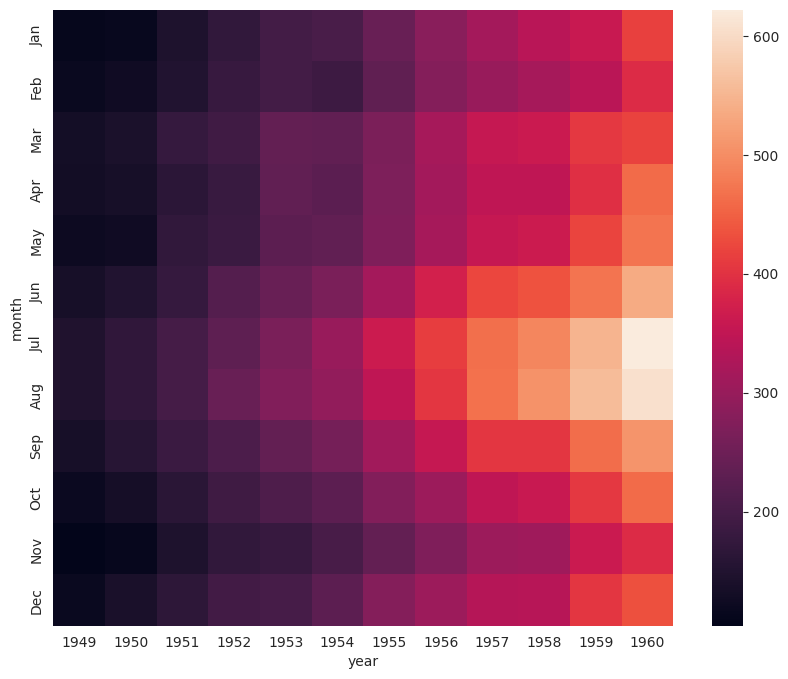

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=flights_pivot)
plt.show()

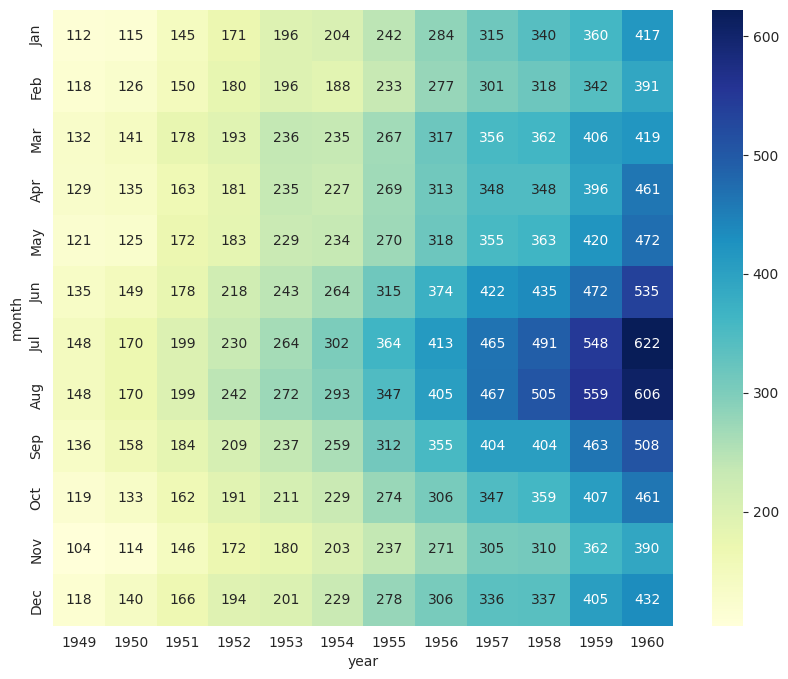

In [51]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=flights_pivot, annot =True, fmt ='d', cmap ='YlGnBu') # annot=True argument를 써서 각 셀에 숫자를 입력(annotate each cell with numeric value)
plt.show();                                                             #fmt='d' 는 정수 형태(integer format)로 숫자를 입력하라는 뜻    

In [17]:
tips = sns.load_dataset('tips')

In [18]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [48]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [49]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [50]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


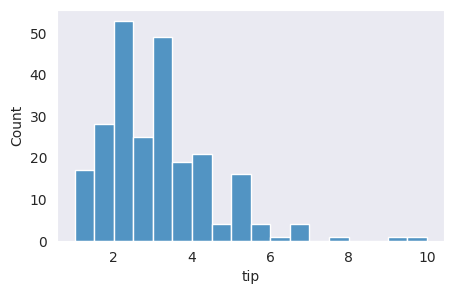

In [54]:
fig, ax = plt.subplots(figsize =(5,3))
sns.histplot(x=tips['tip'])
plt.show();

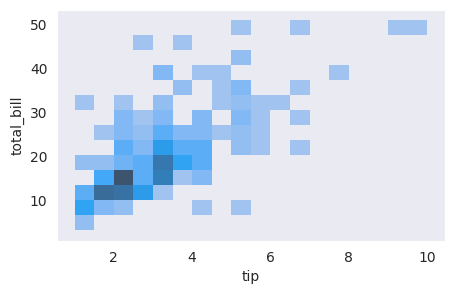

In [55]:
fig, ax = plt.subplots(figsize =(5,3))
sns.histplot(x=tips['tip'],y=tips['total_bill'])
plt.show();

In [52]:
### boxplot

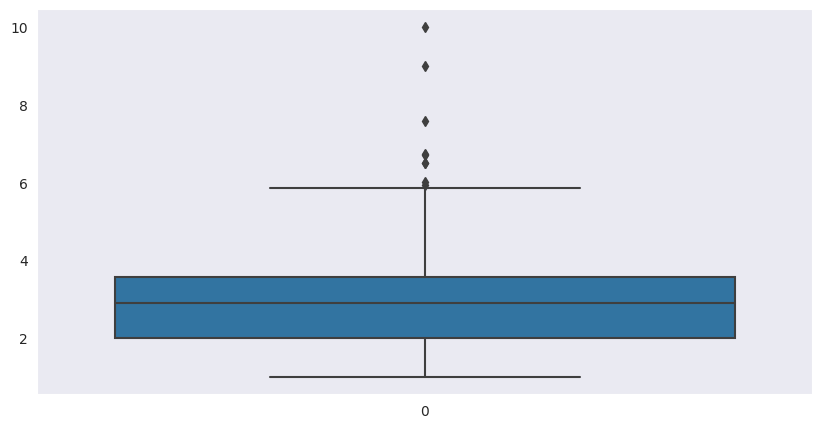

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(tips['tip'])
plt.show(); # 내가가진 데이터의 50프로가 박스 안에 있다 가운데선은 정 중앙값 박스 맨 윗 선은 내가가진 데이터의 75프로 아래는 25퍼 박스 보다 더 위 아래 선은 관측중 가장 큰 값, 작은 값
# 점은 아웃라이어 (이상치)기준선 밖으로 넘어간것

In [66]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


###  boxplot
- boxplot은 데이터 분포 이상치를 시각하기 위해서 사용
- 상자 형태의 그래프가 그려집니다.
    - 25% 제 1 사분위수(Q1)
    - 75% 제 3 사분위수(Q3)
    - 50% 중앙값(Q2)
    - 최댓값, 최소값
    - upper fence, lower fence
    - 이상치


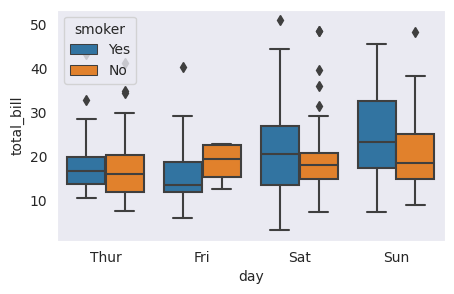

In [69]:
fig, ax = plt.subplots(figsize = (5,3))
sns.boxplot(x=tips['day'], y=tips['total_bill'], hue = tips['smoker']) # hue ~ 에 따라 색을 다르게 하라
plt.show();

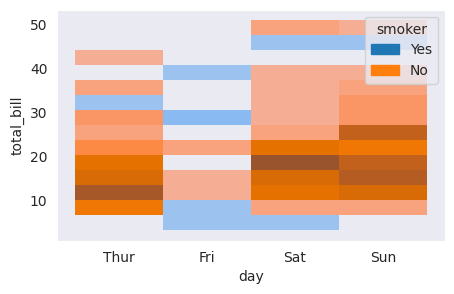

In [71]:
fig, ax = plt.subplots(figsize = (5,3))
sns.histplot(x=tips['day'], y=tips['total_bill'], hue = tips['smoker'])
plt.show();